<a href="https://colab.research.google.com/github/kv1441/LR3/blob/main/LR3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels as sm
import sklearn.metrics
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/МО/Belarus_birth.csv")
df.drop(['Country or Area','Area', 'Record Type', 'Reliability', 'Source Year', 'Value Footnotes'], axis=1, inplace = True)
df

,Year,Month,Value
0,2020,January,7011
1,2020,February,6563
2,2020,March,6606
3,2020,April,6181
4,2020,May,7018
...,...,...,...
303,1990,August,12506
304,1990,September,10658
305,1990,October,12152
306,1990,November,11067


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    308 non-null    int64 
 1   Month   308 non-null    object
 2   Value   308 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.3+ KB


In [ ]:
df = df[(df['Month'] != 'Total') & (df['Month'] != 'Unknown')]
df['Date'] = pd.to_datetime(df['Year'].astype(str) + "-" + df['Month'].astype(str), errors='coerce')
df = df.sort_values(by='Date', ascending = True)
df

<ipython-input-124-45fb861a61cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Year'].astype(str) + "-" + df['Month'].astype(str), errors='coerce')


,Year,Month,Value,Date
296,1990,January,11818,1990-01-01
297,1990,February,11146,1990-02-01
298,1990,March,12255,1990-03-01
299,1990,April,11447,1990-04-01
300,1990,May,13384,1990-05-01
...,...,...,...,...
1,2020,February,6563,2020-02-01
2,2020,March,6606,2020-03-01
3,2020,April,6181,2020-04-01
4,2020,May,7018,2020-05-01


In [ ]:
df.drop(['Year', 'Month', 'Date'], axis=1, inplace = True)
monthly_births = []
for row in range(len(df)):
  monthly_births.extend(list(df.iloc[row]))

monthly_births

[11818,
 11146,
 12255,
 11447,
 13384,
 12299,
 12548,
 12506,
 10658,
 12152,
 11067,
 10887,
 10724,
 10737,
 12035,
 11048,
 11776,
 10794,
 12297,
 11209,
 9802,
 11340,
 10061,
 10222,
 10632,
 10189,
 10808,
 10019,
 10842,
 11474,
 11551,
 10705,
 10444,
 10545,
 9956,
 10806,
 11064,
 9418,
 10449,
 10273,
 10404,
 10050,
 10419,
 9988,
 9312,
 9063,
 8521,
 8423,
 10363,
 9082,
 10342,
 10066,
 9951,
 9796,
 9904,
 9307,
 8492,
 8285,
 7638,
 7373,
 9590,
 8163,
 9044,
 9063,
 9236,
 8976,
 9220,
 8745,
 7802,
 7676,
 7024,
 6605,
 9173,
 7823,
 8485,
 8646,
 8627,
 8212,
 8568,
 8090,
 7171,
 7393,
 6878,
 6732,
 7866,
 7117,
 7112,
 7754,
 7914,
 7377,
 8306,
 7801,
 7070,
 7691,
 6498,
 7080,
 8851,
 7173,
 7926,
 7776,
 8184,
 8022,
 8416,
 7886,
 7719,
 7500,
 6807,
 6385,
 9016,
 7377,
 7938,
 8027,
 8069,
 8479,
 8443,
 8034,
 7818,
 7145,
 6356,
 6273,
 8844,
 6726,
 7692,
 7588,
 7298,
 7914,
 8199,
 7611,
 7189,
 6879,
 6703,
 6300,
 9030,
 7805,
 8739,
 8064,
 8964

In [ ]:
monthly_births = pd.Series(monthly_births, index = pd.date_range(start = '1/1/1997', periods=len(monthly_births), freq = 'M'))
monthly_births

1997-01-31    11818
1997-02-28    11146
1997-03-31    12255
1997-04-30    11447
1997-05-31    13384
              ...  
2020-02-29     6563
2020-03-31     6606
2020-04-30     6181
2020-05-31     7018
2020-06-30     7012
Freq: M, Length: 282, dtype: int64

In [ ]:
train = monthly_births[:265]
test = monthly_births[265:]
fitted_model = sm.tsa.holtwinters.ExponentialSmoothing(train,trend='add',seasonal='add', seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(len(test))

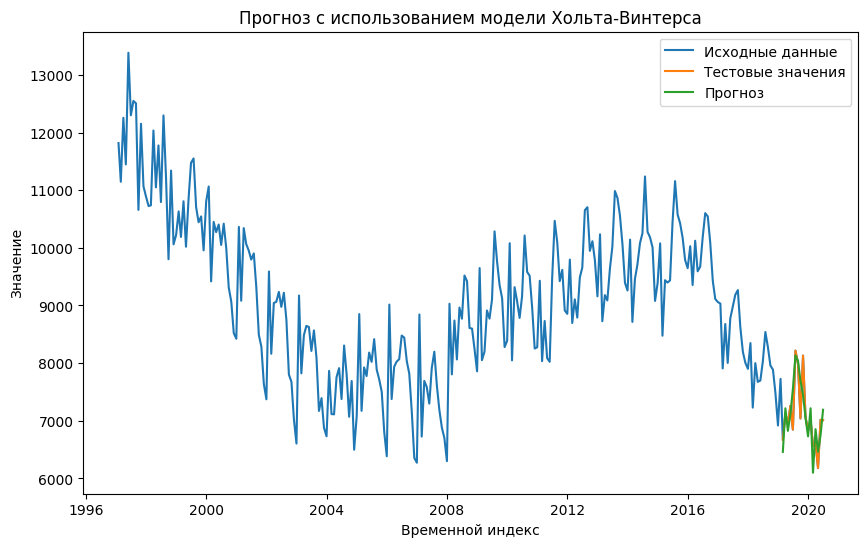

In [ ]:
# Создание графика
plt.figure(figsize=(10, 6))
plt.plot(monthly_births, label='Исходные данные')
plt.plot(test.index, test, label='Тестовые значения')
plt.plot(test.index, test_predictions, label='Прогноз')
plt.xlabel('Временной индекс')
plt.ylabel('Значение')
plt.title('Прогноз с использованием модели Хольта-Винтерса')
plt.legend()
plt.show()

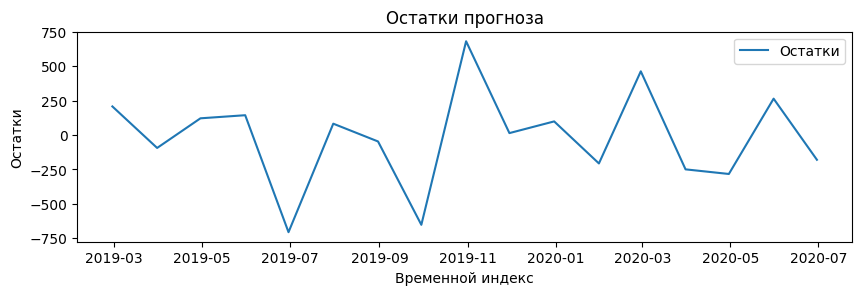

In [ ]:
# Расчет остатков
residuals = test - test_predictions
# Создание графиков
plt.figure(figsize=(10, 6))

# График остатков
plt.subplot(2, 1, 2)
plt.plot(test.index, residuals, label='Остатки')
plt.xlabel('Временной индекс')
plt.ylabel('Остатки')
plt.title('Остатки прогноза')
plt.legend()
plt.show()

In [ ]:
sklearn.metrics.mean_squared_error(test, test_predictions) # разброс значений достаточно сильный ещё и в квадрате

117516.22119592925

In [ ]:
sklearn.metrics.mean_squared_error(test, test_predictions, squared = False) # разброс значений достаточно сильный

342.8063902495536

In [ ]:
sklearn.metrics.r2_score(test, test_predictions) # умеренная способность предсказывать целевую переменную

0.5908189257425693